<a href="https://colab.research.google.com/github/nanoNNsk/superaiss5_hackathon/blob/main/superaiss5_predict_heart_desease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# downlaod dataset

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sibthinonkruesri","key":"1c75217df587ae1a22950d9c66384616"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c hearth-disease-recognition

 70% 3.00M/4.30M [00:00<00:00, 5.45MB/s]
100% 4.30M/4.30M [00:00<00:00, 6.20MB/s]


In [5]:
!unzip hearth-disease-recognition.zip

Archive:  hearth-disease-recognition.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# check data

In [2]:
test_path = "/content/test.csv"
train_path = "/content/train.csv"

In [3]:
import pandas as pd

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [4]:
train_data.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,train_000005,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes


In [5]:
test_data.head()

,ID,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,test_000001,Yes,Yes,Yes,24.84,No,No,No,Yes,No,Yes,No,Good,No,Female,Some college or technical school,"$20,000 to less than $25,000",71,Yes
1,test_000002,Yes,No,Yes,29.08,Yes,No,No,No,No,Yes,No,Fair,No,Female,College graduate,"$50,000 to less than $75,000",61,No
2,test_000003,Yes,Yes,Yes,35.23,Yes,No,No,No,No,Yes,No,Fair,Yes,Female,Some college or technical school,"Less than $10,000",67,Yes
3,test_000004,No,No,Yes,24.78,Yes,No,No,No,No,Yes,No,Fair,No,Female,Some college or technical school,"$50,000 to less than $75,000",50,Yes
4,test_000005,No,No,Yes,27.57,Yes,No,No,No,No,Yes,No,Fair,No,Male,Some college or technical school,"$25,000 to less than $35,000",40,Yes


# prepare data

In [6]:
test_id = test_data.iloc[:,[0]].copy()
test_id.head()

,ID
0,test_000001
1,test_000002
2,test_000003
3,test_000004
4,test_000005


In [7]:
train_id = train_data.iloc[:,[0]].copy()
train_id.head()

,ID
0,train_000001
1,train_000002
2,train_000003
3,train_000004
4,train_000005


In [8]:
train_data.drop(train_data.columns[0], axis=1, inplace=True)
train_data.head()

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes


In [9]:
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,Yes,Yes,Yes,24.84,No,No,No,Yes,No,Yes,No,Good,No,Female,Some college or technical school,"$20,000 to less than $25,000",71,Yes
1,Yes,No,Yes,29.08,Yes,No,No,No,No,Yes,No,Fair,No,Female,College graduate,"$50,000 to less than $75,000",61,No
2,Yes,Yes,Yes,35.23,Yes,No,No,No,No,Yes,No,Fair,Yes,Female,Some college or technical school,"Less than $10,000",67,Yes
3,No,No,Yes,24.78,Yes,No,No,No,No,Yes,No,Fair,No,Female,Some college or technical school,"$50,000 to less than $75,000",50,Yes
4,No,No,Yes,27.57,Yes,No,No,No,No,Yes,No,Fair,No,Male,Some college or technical school,"$25,000 to less than $35,000",40,Yes


In [10]:
test_data.keys()

Index(['High Blood Pressure', 'Told High Cholesterol', 'Cholesterol Checked',
       'Body Mass Index', 'Smoked 100+ Cigarettes', 'Diagnosed Stroke',
       'Diagnosed Diabetes', 'Leisure Physical Activity',
       'Heavy Alcohol Consumption', 'Health Care Coverage',
       'Doctor Visit Cost Barrier', 'General Health', 'Difficulty Walking',
       'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

In [11]:
train_data.keys()

Index(['History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

In [12]:
for key in test_data.keys():
  print(f"column {key}")
  print(test_data[key].unique())

column High Blood Pressure
['Yes' 'No']
column Told High Cholesterol
['Yes' 'No']
column Cholesterol Checked
['Yes' 'No']
column Body Mass Index
[24.84 29.08 35.23 ... 14.28 48.69 49.19]
column Smoked 100+ Cigarettes
['No' 'Yes']
column Diagnosed Stroke
['No' 'Yes']
column Diagnosed Diabetes
['No' 'Yes']
column Leisure Physical Activity
['Yes' 'No']
column Heavy Alcohol Consumption
['No' 'Yes']
column Health Care Coverage
['Yes' 'No']
column Doctor Visit Cost Barrier
['No' 'Yes']
column General Health
['Good' 'Fair' 'Excellent' 'Very Poor' 'Poor']
column Difficulty Walking
['No' 'Yes']
column Sex
['Female' 'Male']
column Education Level
['Some college or technical school' 'College graduate'
 'High school graduate' 'Some high school' 'Elementary'
 'Never attended school']
column Income Level
['$20,000 to less than $25,000' '$50,000 to less than $75,000'
 'Less than $10,000' '$25,000 to less than $35,000'
 '$35,000 to less than $50,000' '$15,000 to less than $20,000'
 '($10,000 to less t

In [13]:
test_data.dtypes

,0
High Blood Pressure,object
Told High Cholesterol,object
Cholesterol Checked,object
Body Mass Index,float64
Smoked 100+ Cigarettes,object
Diagnosed Stroke,object
Diagnosed Diabetes,object
Leisure Physical Activity,object
Heavy Alcohol Consumption,object
Health Care Coverage,object


In [14]:
for key in train_data.keys():
  print(f"column {key}")
  print(train_data[key].unique())

column History of HeartDisease or Attack
['No' nan 'Yes']
column High Blood Pressure
['Yes' 'No']
column Told High Cholesterol
['Yes' 'No' nan]
column Cholesterol Checked
['Yes' 'No']
column Body Mass Index
[40.68 24.36 27.33 ... 60.75 14.73 60.36]
column Smoked 100+ Cigarettes
['Yes' 'No' nan]
column Diagnosed Stroke
['No' 'Yes']
column Diagnosed Diabetes
['No' 'Yes' nan]
column Leisure Physical Activity
['No' 'Yes']
column Heavy Alcohol Consumption
['No' 'Yes']
column Health Care Coverage
['Yes' 'No']
column Doctor Visit Cost Barrier
['No' 'Yes' nan]
column General Health
['Very Poor' 'Fair' 'Good' 'Poor' 'Excellent' nan]
column Difficulty Walking
['Yes' 'No' nan]
column Sex
['Female' 'Male']
column Education Level
['High school graduate' 'College graduate' 'Some high school'
 'Some college or technical school' 'Elementary' 'Never attended school']
column Income Level
['$15,000 to less than $20,000' 'Less than $10,000' '$75,000 or more'
 '$35,000 to less than $50,000' '$20,000 to les

In [15]:
train_data = train_data.fillna('unknown')

In [16]:
for key in train_data.keys():
  print(f"column {key}")
  print(train_data[key].unique())

column History of HeartDisease or Attack
['No' 'unknown' 'Yes']
column High Blood Pressure
['Yes' 'No']
column Told High Cholesterol
['Yes' 'No' 'unknown']
column Cholesterol Checked
['Yes' 'No']
column Body Mass Index
[40.68 24.36 27.33 ... 60.75 14.73 60.36]
column Smoked 100+ Cigarettes
['Yes' 'No' 'unknown']
column Diagnosed Stroke
['No' 'Yes']
column Diagnosed Diabetes
['No' 'Yes' 'unknown']
column Leisure Physical Activity
['No' 'Yes']
column Heavy Alcohol Consumption
['No' 'Yes']
column Health Care Coverage
['Yes' 'No']
column Doctor Visit Cost Barrier
['No' 'Yes' 'unknown']
column General Health
['Very Poor' 'Fair' 'Good' 'Poor' 'Excellent' 'unknown']
column Difficulty Walking
['Yes' 'No' 'unknown']
column Sex
['Female' 'Male']
column Education Level
['High school graduate' 'College graduate' 'Some high school'
 'Some college or technical school' 'Elementary' 'Never attended school']
column Income Level
['$15,000 to less than $20,000' 'Less than $10,000' '$75,000 or more'
 '$35

In [17]:
train_data.dtypes

,0
History of HeartDisease or Attack,object
High Blood Pressure,object
Told High Cholesterol,object
Cholesterol Checked,object
Body Mass Index,object
Smoked 100+ Cigarettes,object
Diagnosed Stroke,object
Diagnosed Diabetes,object
Leisure Physical Activity,object
Heavy Alcohol Consumption,object


In [18]:
train_data.head()

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,unknown,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes


In [19]:
train_data['Body Mass Index'] = pd.to_numeric(train_data['Body Mass Index'], errors='coerce')


In [20]:
train_data.dtypes

,0
History of HeartDisease or Attack,object
High Blood Pressure,object
Told High Cholesterol,object
Cholesterol Checked,object
Body Mass Index,float64
Smoked 100+ Cigarettes,object
Diagnosed Stroke,object
Diagnosed Diabetes,object
Leisure Physical Activity,object
Heavy Alcohol Consumption,object


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == object:
        train_data[column] = label_encoder.fit_transform(train_data[column])

In [22]:
label_encoder = LabelEncoder()
for column in test_data.columns:
    if test_data[column].dtype == object:
        test_data[column] = label_encoder.fit_transform(test_data[column])

In [23]:
test_data.dtypes

,0
High Blood Pressure,int64
Told High Cholesterol,int64
Cholesterol Checked,int64
Body Mass Index,float64
Smoked 100+ Cigarettes,int64
Diagnosed Stroke,int64
Diagnosed Diabetes,int64
Leisure Physical Activity,int64
Heavy Alcohol Consumption,int64
Health Care Coverage,int64


In [24]:
train_data.head()

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,0,1,1,1,40.68,1,0,0,0,0,1,0,4,1,0,2,0,64,1
1,0,0,0,0,24.36,1,0,0,1,0,0,1,1,0,0,0,7,50,0
2,0,1,1,1,27.33,0,0,0,0,0,1,1,4,1,0,2,5,61,1
3,0,1,0,1,27.01,0,0,0,1,0,1,0,2,0,0,5,3,74,1
4,2,1,1,1,34.56,1,0,0,1,0,1,1,4,1,1,5,0,98,1


In [25]:
test_data.head()

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,1,1,1,24.84,0,0,0,1,0,1,0,2,0,0,4,1,71,1
1,1,0,1,29.08,1,0,0,0,0,1,0,1,0,0,0,4,61,0
2,1,1,1,35.23,1,0,0,0,0,1,0,1,1,0,4,7,67,1
3,0,0,1,24.78,1,0,0,0,0,1,0,1,0,0,4,4,50,1
4,0,0,1,27.57,1,0,0,0,0,1,0,1,0,1,4,2,40,1


In [26]:
num_test=test_data.shape[0]
num_test

74361

In [78]:
  train_data['History of HeartDisease or Attack'].value_counts()

,count
History of HeartDisease or Attack,
0,203322
1,18068
2,1694


# find some column that not use

In [80]:
from sklearn.ensemble import RandomForestClassifier
X = train_data.drop(columns=['History of HeartDisease or Attack'])
y = train_data['History of HeartDisease or Attack']

model = RandomForestClassifier()

model.fit(X, y)

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                                        importance
Body Mass Index                           0.301713
Age                                       0.215475
Income Level                              0.101145
General Health                            0.067882
Education Level                           0.067110
High Blood Pressure                       0.028082
Diagnosed Stroke                          0.026612
Leisure Physical Activity                 0.025905
Difficulty Walking                        0.023573
Told High Cholesterol                     0.023192
Vegetable or Fruit Intake (1+ per Day)    0.020576
Sex                                       0.020141
Diagnosed Diabetes                        0.019413
Smoked 100+ Cigarettes                    0.019093
Doctor Visit Cost Barrier                 0.015324
Heavy Alcohol Consumption                 0.008755
Health Care Coverage                      0.008360
Cholesterol Checked                       0.007649


In [83]:
target = 'History of HeartDisease or Attack'
features = train_data.drop(columns=[target])
correlations = features.apply(lambda x: x.corr(train_data[target]))
print(correlations)

High Blood Pressure                       0.210312
Told High Cholesterol                     0.039573
Cholesterol Checked                       0.095288
Body Mass Index                           0.055560
Smoked 100+ Cigarettes                    0.102259
Diagnosed Stroke                          0.196242
Diagnosed Diabetes                        0.163599
Leisure Physical Activity                -0.078130
Heavy Alcohol Consumption                -0.026196
Health Care Coverage                      0.030126
Doctor Visit Cost Barrier                 0.027303
General Health                            0.185273
Difficulty Walking                        0.209980
Sex                                       0.067053
Education Level                           0.053389
Income Level                             -0.049672
Age                                       0.223049
Vegetable or Fruit Intake (1+ per Day)   -0.021895
dtype: float64


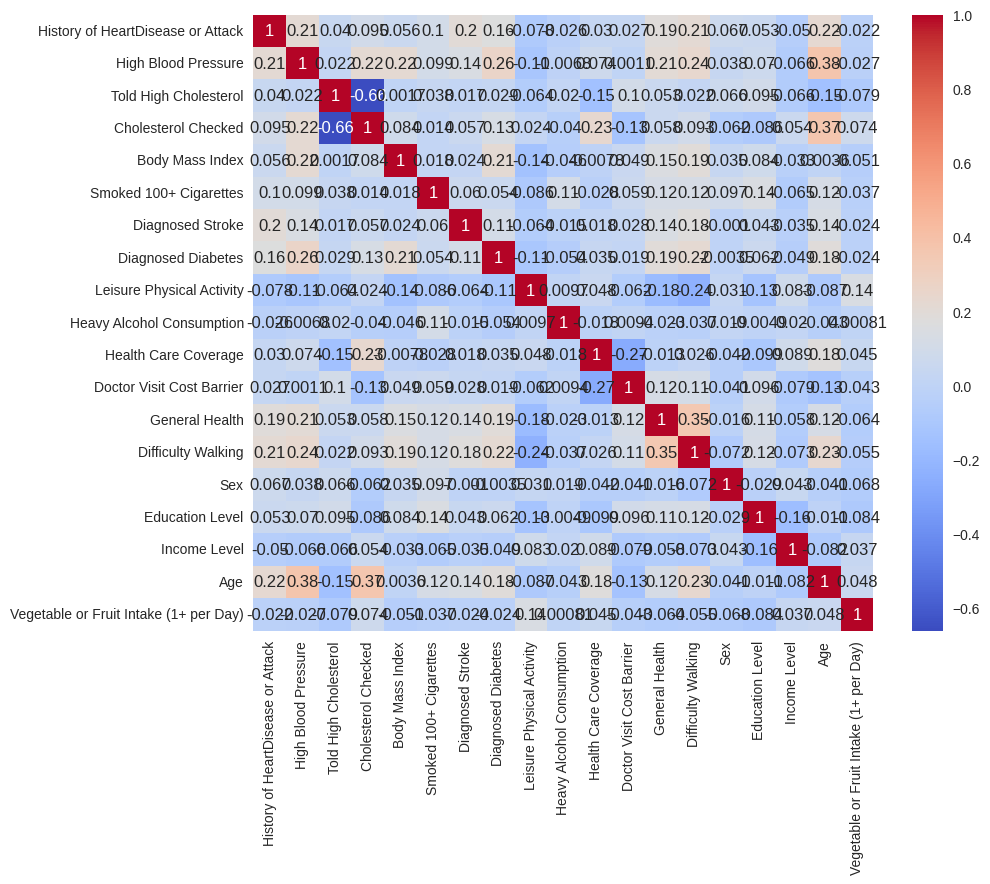

History of HeartDisease or Attack         1.000000
Age                                       0.223049
High Blood Pressure                       0.210312
Difficulty Walking                        0.209980
Diagnosed Stroke                          0.196242
General Health                            0.185273
Diagnosed Diabetes                        0.163599
Smoked 100+ Cigarettes                    0.102259
Cholesterol Checked                       0.095288
Sex                                       0.067053
Body Mass Index                           0.055560
Education Level                           0.053389
Told High Cholesterol                     0.039573
Health Care Coverage                      0.030126
Doctor Visit Cost Barrier                 0.027303
Vegetable or Fruit Intake (1+ per Day)   -0.021895
Heavy Alcohol Consumption                -0.026196
Income Level                             -0.049672
Leisure Physical Activity                -0.078130
Name: History of HeartDisease o

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

target = 'History of HeartDisease or Attack'
correlations = train_data.corr()[target].sort_values(ascending=False)

print(correlations)


In [85]:
train_data = train_data.drop(columns=['Vegetable or Fruit Intake (1+ per Day)',\
                                      'Heavy Alcohol Consumption',\
                                      'Income Level',\
                                      'Leisure Physical Activity'])
test_data = test_data.drop(columns=['Vegetable or Fruit Intake (1+ per Day)',\
                                      'Heavy Alcohol Consumption',\
                                      'Income Level',\
                                      'Leisure Physical Activity'])

In [86]:
train_data.keys()

Index(['History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Age'],
      dtype='object')

In [87]:
test_data.keys()

Index(['High Blood Pressure', 'Told High Cholesterol', 'Cholesterol Checked',
       'Body Mass Index', 'Smoked 100+ Cigarettes', 'Diagnosed Stroke',
       'Diagnosed Diabetes', 'Health Care Coverage',
       'Doctor Visit Cost Barrier', 'General Health', 'Difficulty Walking',
       'Sex', 'Education Level', 'Age'],
      dtype='object')

In [88]:
 train_data['History of HeartDisease or Attack'].value_counts()

,count
History of HeartDisease or Attack,
0,203322
1,18068
2,1694


# model training

In [28]:
!pip install pycaret

In [89]:
from pycaret.classification import *
classification_setup = setup(data=train_data, target='History of HeartDisease or Attack', session_id=42, fix_imbalance=True)

,Description,Value
0,Session id,42
1,Target,History of HeartDisease or Attack
2,Target type,Multiclass
3,Original data shape,"(223084, 15)"
4,Transformed data shape,"(493901, 15)"
5,Transformed train set shape,"(426975, 15)"
6,Transformed test set shape,"(66926, 15)"
7,Numeric features,14
8,Rows with missing values,5.3%
9,Preprocess,True


In [34]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9131,0.8547,0.9131,0.8811,0.8833,0.1375,0.2017,8.6010
gbc,Gradient Boosting Classifier,0.9129,0.0000,0.9129,0.8810,0.8846,0.1520,0.2116,33.9540
ada,Ada Boost Classifier,0.9126,0.0000,0.9126,0.8812,0.8865,0.1733,0.2262,3.0550
lr,Logistic Regression,0.9125,0.0000,0.9125,0.8801,0.8848,0.1558,0.2119,19.8530
ridge,Ridge Classifier,0.9123,0.0000,0.9123,0.8843,0.8733,0.0376,0.1092,0.2310
xgboost,Extreme Gradient Boosting,0.9118,0.8503,0.9118,0.8784,0.8839,0.1484,0.2027,4.0010
dummy,Dummy Classifier,0.9114,0.5000,0.9114,0.8307,0.8692,0.0000,0.0000,0.1140
svm,SVM - Linear Kernel,0.9088,0.0000,0.9088,0.8801,0.8858,0.1858,0.2261,8.2000
rf,Random Forest Classifier,0.9082,0.8222,0.9082,0.8720,0.8821,0.1443,0.1830,14.6270
lda,Linear Discriminant Analysis,0.9068,0.0000,0.9068,0.8788,0.8890,0.2289,0.2510,0.2080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [35]:
trained_model = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9136,0.8599,0.9136,0.8831,0.8841,0.1425,0.2094
1,0.9134,0.8593,0.9134,0.8828,0.8837,0.1392,0.2056
2,0.9109,0.8502,0.9109,0.8745,0.8807,0.1185,0.1725
3,0.9129,0.8509,0.9129,0.8808,0.8825,0.1296,0.1951
4,0.9141,0.8553,0.9141,0.8846,0.8844,0.1448,0.2150
5,0.9126,0.8492,0.9126,0.8790,0.8822,0.1292,0.1924
6,0.9115,0.8589,0.9115,0.8754,0.8806,0.1165,0.1747
7,0.9136,0.8530,0.9136,0.8826,0.8842,0.1448,0.2110
8,0.9142,0.8616,0.9142,0.8848,0.8865,0.1655,0.2297


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
evaluate_model(trained_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
tuned_model = tune_model(trained_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9132,0.8625,0.9132,0.8817,0.8834,0.1373,0.2028
1,0.9136,0.8620,0.9136,0.8832,0.8834,0.1357,0.2045
2,0.9107,0.8525,0.9107,0.8736,0.8802,0.1147,0.1681
3,0.9126,0.8512,0.9126,0.8797,0.8817,0.1217,0.1866
4,0.9146,0.8562,0.9146,0.8866,0.8844,0.1426,0.2177
5,0.9132,0.8514,0.9132,0.8808,0.8831,0.1368,0.2023
6,0.9126,0.8601,0.9126,0.8792,0.8821,0.1273,0.1910
7,0.9146,0.8540,0.9146,0.8856,0.8853,0.1522,0.2240
8,0.9136,0.8645,0.9136,0.8830,0.8852,0.1536,0.2169


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [38]:
final_model = finalize_model(tuned_model)

# test model

In [39]:
predictions = predict_model(final_model, data=test_data)
predictions.head()

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),prediction_label,prediction_score
0,1,1,1,24.840000,0,0,0,1,0,1,0,2,0,0,4,1,71,1,0,0.8811
1,1,0,1,29.080000,1,0,0,0,0,1,0,1,0,0,0,4,61,0,0,0.9649
2,1,1,1,35.230000,1,0,0,0,0,1,0,1,1,0,4,7,67,1,0,0.8025
3,0,0,1,24.780001,1,0,0,0,0,1,0,1,0,0,4,4,50,1,0,0.9780
4,0,0,1,27.570000,1,0,0,0,0,1,0,1,0,1,4,2,40,1,0,0.9776


In [70]:
answer=predictions['prediction_label'].copy()
answer = answer.to_frame()
answer.head()

,prediction_label
0,0
1,0
2,0
3,0
4,0


In [71]:
answer.value_counts()

,count
prediction_label,
0,73156
1,1205


In [42]:
submiss_path = "/content/sample_submission.csv"

In [43]:
submission = pd.read_csv(submiss_path)
submission.head()

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,No
3,test_000004,NaN
4,test_000005,NaN


In [74]:
answer.keys()

Index(['prediction_label'], dtype='object')

In [75]:
answer['prediction_label'] = answer['prediction_label'].replace({0: 'No', 1: 'Yes'})
answer.head()

,prediction_label
0,No
1,No
2,No
3,No
4,No


In [76]:
submission['History of HeartDisease or Attack'] = answer['prediction_label']
submission.head()

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,No
3,test_000004,No
4,test_000005,No


In [77]:
submission.to_csv('submission.csv', index=False)